<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-зарплат" data-toc-modified-id="Анализ-зарплат-1">Анализ зарплат</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-чтение-датасета" data-toc-modified-id="Импорт-библиотек-и-чтение-датасета-1.1">Импорт библиотек и чтение датасета</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2">Загрузка данных</a></span></li></ul></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2">Задание</a></span><ul class="toc-item"><li><span><a href="#Распределение-зарплат" data-toc-modified-id="Распределение-зарплат-2.1">Распределение зарплат</a></span></li><li><span><a href="#Анализ-факторов" data-toc-modified-id="Анализ-факторов-2.2">Анализ факторов</a></span><ul class="toc-item"><li><span><a href="#пол-/-sex" data-toc-modified-id="пол-/-sex-2.2.1">пол / sex</a></span></li><li><span><a href="#тип-населенного-пункта-/-town_type" data-toc-modified-id="тип-населенного-пункта-/-town_type-2.2.2">тип населенного пункта / town_type</a></span></li><li><span><a href="#семейное-положение-/-marital_status" data-toc-modified-id="семейное-положение-/-marital_status-2.2.3">семейное положение / marital_status</a></span></li><li><span><a href="#проффессиональная-группа-/-professional_group" data-toc-modified-id="проффессиональная-группа-/-professional_group-2.2.4">проффессиональная группа / professional_group</a></span></li><li><span><a href="#образование-/-finished_education" data-toc-modified-id="образование-/-finished_education-2.2.5">образование / finished_education</a></span></li><li><span><a href="#индустрия-/-industry" data-toc-modified-id="индустрия-/-industry-2.2.6">индустрия / industry</a></span></li></ul></li><li><span><a href="#Кодировка-категориальных-признаков" data-toc-modified-id="Кодировка-категориальных-признаков-2.3">Кодировка категориальных признаков</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.4">Линейная регрессия</a></span></li><li><span><a href="#Корректность-линейной-регрессии" data-toc-modified-id="Корректность-линейной-регрессии-2.5">Корректность линейной регрессии</a></span></li></ul></li></ul></div>

# Анализ зарплат

Эта домашняя работа будет основана на основе данных РМЭЗ НИУ ВШЭ
- [об исследовании подробнее](https://www.hse.ru/rlms/)
- [данные за разные года](https://www.hse.ru/rlms/spss)
- [опросник для 25-ой волны](https://www.hse.ru/data/2018/11/15/1169536982/r25a_user_1216.pdf)
    - [за остальные волны](https://www.hse.ru/rlms/question)
- [кодировка переменных 25-ой волны](https://www.hse.ru/data/2019/09/09/1170599989/R25_ind_codebook_09.2019.pdf)
    - [за остальные волны](https://www.hse.ru/rlms/code)

## Импорт библиотек и чтение датасета

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts
from scipy import stats
import statsmodels as sts

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import chisquare
from scipy.stats import poisson
from statsmodels.stats.weightstats import ztest
from matplotlib.pyplot import figure

%matplotlib inline
import statsmodels.api as sm # все, для работы с рядами
import statsmodels.formula.api as smf

from scipy.special import inv_boxcox # обратное преобразование Бокса-Кокса 
from itertools import product # произведения множеств
import warnings # чтобы отключить предупреждения в Python

In [4]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

## Загрузка данных

Далее идет небольшая предобработка датасета, это код можно просто запустить

In [5]:
# тип данных в колонках
cols = {
    'status':'category',
    'popul':'category',
    'u_age':float,
    'uh5':'category',
    'u_marst':'category',
    'u_diplom':'category',
    'u_educ':'category',
    'u_occup08':'category',
    'uj1':'category',
    'uj4.1':'category',
    'uj13.2':float
}


In [6]:
# как они будут переименованы
rename_cols={
    'status':'town_type',
    'popul':'population',
    'u_age':'age',
    'uh5':'sex',
    'u_marst':'marital_status',
    'u_diplom':'finished_education',
    'u_educ':'education',
    'u_occup08':'professional_group',
    'uj1':'employed',
    'uj4.1':'industry',
    'uj13.2':'wage'}


In [7]:
df = pd.read_csv('./data/r25iall26с.csv', usecols=cols.keys(), dtype=cols, 
                 na_values=['#NULL!','NA','99999999','99999998','99999997'], 
                 low_memory=False)
df = df.rename(columns = rename_cols)
df.head()

,town_type,population,age,professional_group,education,finished_education,marital_status,sex,employed,industry,wage
0,3,12187,43.0,2,21,6,4,2,1,10,40000.0
1,3,12187,61.0,5,16,4,5,2,1,12,28000.0
2,3,12187,32.0,5,10,3,4,2,1,14,NaN
3,3,12187,30.0,NaN,9,3,2,1,5,NaN,NaN
4,3,12187,72.0,NaN,7,2,1,2,5,NaN,NaN


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18756 entries, 0 to 18755
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   town_type           18756 non-null  category
 1   population          18756 non-null  category
 2   age                 18755 non-null  float64 
 3   professional_group  8292 non-null   category
 4   education           15280 non-null  category
 5   finished_education  15280 non-null  category
 6   marital_status      15289 non-null  category
 7   sex                 18756 non-null  category
 8   employed            15302 non-null  category
 9   industry            8286 non-null   category
 10  wage                7025 non-null   float64 
dtypes: category(9), float64(2)
memory usage: 485.0 KB


In [9]:
df.describe()

,age,wage
count,18755.000000,7025.000000
mean,38.184537,24324.848114
std,22.702215,18163.937524
min,0.000000,0.000000
25%,20.000000,14000.000000
50%,37.000000,20000.000000
75%,56.000000,30000.000000
max,102.000000,400000.000000


In [10]:
for j in df.dtypes[df.dtypes=='category'].index:
    print('\n',j,list(df[j].unique()))


 town_type ['3', '4', '1', '2']

 population ['12187', '3702', '2422', '2100', '1436', '1420', '623', '60', '853848', '93995', '437', '95191', '1753', '3589', '38', '154', '327', '305', '256', '335', '3890', '6', '24547', '20', '600', '6717', '1477', '957', '1234', '409', '36', '1216965', '325189', '231104', '29954', '299', '94', '569', '69944', '11761', '11174', '19746', '5859', '1300', '3835', '1245', '1045', '926', '964', '608', '560', '1066934', '60039', '473', '103', '843460', '569293', '510020', '50652', '282', '1130', '1768', '9993', '8007', '5758', '6664', '1761', '1298', '1989', '203826', '1093', '39025', '240', '883', '606653', '7613', '2305', '1100', '346', '1266', '399', '863', '64315', '1195', '420', '6067', '243536', '1191994', '9755', '3046', '3246', '1450', '1328', '700', '288', '80', '1266871', '9954', '1320', '590', '124', '87', '1638', '28', '3', '10', '28362', '5941', '1201', '360', '2562', '2357', '328906', '485930', '122247', '12330126', '5225690', '20802', '1159

In [11]:
# как будут переименованы категории

town_type={1:'Областной центр',
2:'Город',
3:'Посёлок городского типа' ,
4:'Село',
}

marital_status={
1: 'Никогда в браке не состояли',
2: 'Состоите в зарегистрированном браке',
3: 'Живете вместе, но не зарегистрированы',
4: 'Разведены и в браке не состоите',
5: 'Bдовец (вдова)',
6: 'Официально зарегистрированы, но вместе не проживают',
}

sex={
1: 'М',
2: 'Ж',
}


professional_group=[
'Военнослужащие',
'Законодатели; крупные чиновники; руководители высш. и сред. звена',
'Специалисты высшего уровня квалификации',
'Специалисты среднего уровня квалификации; чиновники',
'Служащие офисные и по обслуживанию клиентов',
'Работники сферы торговли и услуг',
'Квалифицированные работники сельского, лесного хоз-ва и рыбоводства',
'Квалифицированные рабочие, занятые ручным трудом',
'Квалифицированные рабочие, исп. машины и механизмы',
'Неквалифицированные рабочие всех отраслей',
]
professional_group = {x:professional_group[x] for x in range(len(professional_group))}


finished_education = ['окончил 0 - 6 классов',
 'незаконченное среднее образование (7 - 8 кл)',
 'незаконченное среднее образование (7 - 8 кл) + что-то еще',
 'законченное среднее образование',
 'законченное среднее специальное образование',
 'законченное высшее образование и выше']
finished_education = {x:finished_education[x-1] for x in range(1,len(finished_education)+1)}


education = ['0 классов школы',
'1 класс школы',
'2 класса школы',
'3 класса школы',
'4 класса школы',
'5 классов школы',
'6 классов школы',
'7 классов школы',
'8 классов школы',
'9 классов школы',
'7-9 классов школы (незак. средн) +     без диплома',
'7-9 классов школы (незак. средн) +     с дипломом',
'10 и более классов школы без аттестата о среднем образовании',
'7-9 классов школы (незак. среднее) и менее 2 лет в техникуме',
'среднее образование - есть аттестат о ср. образовании',
'10 и более классов школы и какое-либо професс. обр. без диплома',
'10 и более классов школы и какое-либо професс. обр. с дипломом',
'10 и более классов школы и техникум без диплома',
'техникум с дипломом',
'1-2 года в высшем учебном заведении',
'3 и более лет в высшем учебном заведении',
'есть диплом о высшем образовании',
'аспирантура и т.п. без диплома',
'аспирантура и т.п. с дипломом',]
education = {x:education[x] for x in range(len(education))}

industry = ['ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ',
'ГРАЖДАНСКОЕ МАШИНОСТРОЕНИЕ',
'ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС',
'НЕФТЕГАЗОВАЯ ПРОМЫШЛЕННОСТЬ',
'ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ',
'СТРОИТЕЛЬСТВО',
'ТРАНСПОРТ, СВЯЗЬ',
'СЕЛЬСКОЕ ХОЗЯЙСТВО',
'ОРГАНЫ УПРАВЛЕНИЯ',
'ОБРАЗОВАНИЕ',
'НАУКА, КУЛЬТУРА',
'ЗДРАВООХРАНЕНИЕ',
'АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ',
'ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ',
'ФИНАНСЫ И СТРАХОВАНИЕ',
'ЭНЕРГЕТИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ',
'ЖИЛИЩНО-КОММУНАЛЬНОЕ ХОЗЯЙСТВО',
'ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ',
'ДРУГОЕ',]
industry=[x.lower().capitalize() for x in industry]
industry = {x:industry[x-1] for x in range(1,1+len(industry))}

employed = ['Вы сейчас работаете ',
'Вы находитесь в отпуске - декретном или по уходу за ребёнком до 3-х лет ',
'Вы находитесь в любом другом оплачиваемом отпуске ',
'Вы находитесь в неоплачиваемом отпуске ',
'Или у Вас сейчас нет работы',]
employed = {x:employed[x-1] for x in range(1,1+len(employed))}


In [12]:
df['population'] = df['population'].astype(int)

In [13]:
df['industry'] = np.where(df['industry'].astype(float)>19,19,df['industry'])
df['industry'] = df['industry'].astype('category')
df['industry'].head()

0     10
1     12
2     14
3    NaN
4    NaN
Name: industry, dtype: category
Categories (19, object): [19, '1', '10', '11', ..., '6', '7', '8', '9']

In [14]:
cats = df.dtypes[df.dtypes=='category'].index
for col in cats:
    dict_j = globals()[col]
#     print('\n',col,dict_j,sep='\n')
#     df[col] = df[col].astype('category').cat.rename_categories(dict_j)
    df[col] = df[col].astype(float).replace(dict_j).astype('category')


In [15]:
df.head(10)

,town_type,population,age,professional_group,education,finished_education,marital_status,sex,employed,industry,wage
0,Посёлок городского типа,12187,43.0,Специалисты высшего уровня квалификации,есть диплом о высшем образовании,законченное высшее образование и выше,Разведены и в браке не состоите,Ж,Вы сейчас работаете,Образование,40000.0
1,Посёлок городского типа,12187,61.0,Работники сферы торговли и услуг,10 и более классов школы и какое-либо професс....,законченное среднее образование,Bдовец (вдова),Ж,Вы сейчас работаете,Здравоохранение,28000.0
2,Посёлок городского типа,12187,32.0,Работники сферы торговли и услуг,7-9 классов школы (незак. средн) + без дип...,незаконченное среднее образование (7 - 8 кл) +...,Разведены и в браке не состоите,Ж,Вы сейчас работаете,"Торговля, бытовое обслуживание",NaN
3,Посёлок городского типа,12187,30.0,NaN,9 классов школы,незаконченное среднее образование (7 - 8 кл) +...,Состоите в зарегистрированном браке,М,Или у Вас сейчас нет работы,NaN,NaN
4,Посёлок городского типа,12187,72.0,NaN,7 классов школы,незаконченное среднее образование (7 - 8 кл),Никогда в браке не состояли,Ж,Или у Вас сейчас нет работы,NaN,NaN
5,Посёлок городского типа,12187,70.0,NaN,1-2 года в высшем учебном заведении,законченное среднее специальное образование,Состоите в зарегистрированном браке,Ж,Или у Вас сейчас нет работы,NaN,NaN
6,Посёлок городского типа,12187,45.0,Неквалифицированные рабочие всех отраслей,10 и более классов школы и какое-либо професс....,законченное среднее образование,Разведены и в браке не состоите,Ж,Вы сейчас работаете,"Наука, культура",32000.0
7,Посёлок городского типа,12187,22.0,Специалисты среднего уровня квалификации; чино...,9 классов школы,незаконченное среднее образование (7 - 8 кл) +...,Никогда в браке не состояли,М,Вы сейчас работаете,Другое,25000.0
8,Посёлок городского типа,12187,62.0,NaN,8 классов школы,незаконченное среднее образование (7 - 8 кл),Состоите в зарегистрированном браке,Ж,Или у Вас сейчас нет работы,NaN,NaN
9,Посёлок городского типа,12187,59.0,Работники сферы торговли и услуг,среднее образование - есть аттестат о ср. обра...,законченное среднее образование,Состоите в зарегистрированном браке,М,Вы сейчас работаете,"Наука, культура",21000.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18756 entries, 0 to 18755
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   town_type           18756 non-null  category
 1   population          18756 non-null  int64   
 2   age                 18755 non-null  float64 
 3   professional_group  8292 non-null   category
 4   education           15280 non-null  category
 5   finished_education  15280 non-null  category
 6   marital_status      15289 non-null  category
 7   sex                 18756 non-null  category
 8   employed            15302 non-null  category
 9   industry            8286 non-null   category
 10  wage                7025 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 589.0 KB


In [17]:
df.isnull().sum()

town_type                 0
population                0
age                       1
professional_group    10464
education              3476
finished_education     3476
marital_status         3467
sex                       0
employed               3454
industry              10470
wage                  11731
dtype: int64

# Задание

| Задание                            | Баллы          |
|------------------------------------|----------------|
| Добавление новых переменных        |             5 |
| Распределение зарплат              |             15 |
| Анализ факторов                    |             50+50 |
| Кодировка категориальных признаков |             10 |
| Линейная регрессия                 |             10 |
| Корректность линейной регрессии    |             10 |
| Всего                              |            100 |

## Распределение зарплат

Изучите опросник или кодировку переменных в этом исследовании и добавьте 1-3 переменных, которые могли бы влиять на зарплату.


Исследуйте распределение зарплат в России. 

- Похоже ли распределение на нормальное? А после логарифмирования? Воспользуйтесь формальными критериями для выводов. Если бы выборка была меньше, изменились бы выводы?
- Постройте подходящие гистограммы. Проанализируйте qq-график для исходной переменной и логарифмированной. Можно ли предположить, что логарифм зарплат имеет нормальное распределение?


In [18]:
ds = df.copy()
ds.dropna(subset=['employed'], inplace=True)
df = ds.loc[ds['employed'].str.contains("Вы сейчас работаете")]

df.employed.unique()

['Вы сейчас работаете ']
Categories (1, object): ['Вы сейчас работаете ']

<AxesSubplot:xlabel='wage', ylabel='Density'>

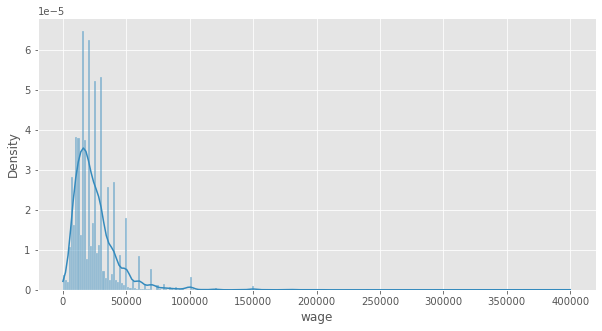

In [19]:
sns.histplot(df['wage'], stat='density', kde=True)

# Распределение не похоже на нормальное

In [20]:
df.isnull().sum()

town_type                0
population               0
age                      0
professional_group      33
education               11
finished_education      11
marital_status          13
sex                      0
employed                 0
industry                38
wage                  1217
dtype: int64

In [21]:
df = df.fillna(df.mean())
df.isnull().sum()

town_type              0
population             0
age                    0
professional_group    33
education             11
finished_education    11
marital_status        13
sex                    0
employed               0
industry              38
wage                   0
dtype: int64

<AxesSubplot:xlabel='ln_wage', ylabel='Density'>

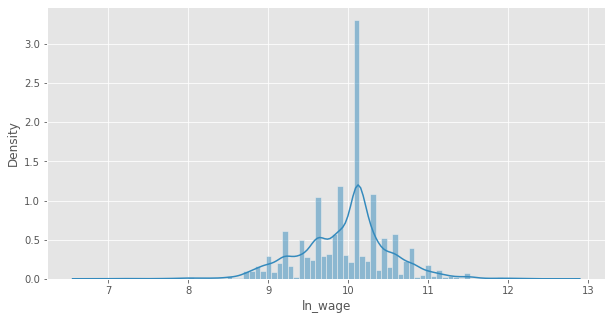

In [23]:
df['ln_wage'] = df['wage'].apply(np.log)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["ln_wage", "wage"], inplace=True)
sns.histplot(df['ln_wage'], stat='density', kde=True)

# Распределение похоже на бимодальное нормальное и скошено вправо

In [393]:
# 1. Формальный подход с помощью теста Колмогорова-Смирнова

# Воспользуемся критерием Колмогорова, тк у нас непрерывное распределение

# H_0: ln_wage имеет нормальное распределение
# H_1

x = df['ln_wage']
mu, sigma = x.mean(), x.std(ddof=1)

print('pvalue < 0.05 => гипотеза о принадлежности к норм. распределению отвергается')
_, pvalue = stats.kstest(x, 'norm', args=(mu, sigma))
print('PVAL {0:.10f}'.format(pvalue))

pvalue < 0.05 => гипотеза о принадлежности к норм. распределению отвергается
PVAL 0.0000000000


Возможно, если наблюдений было бы меньше и они были бы не NaN по зп, то гипотеза могла бы не отвергаться

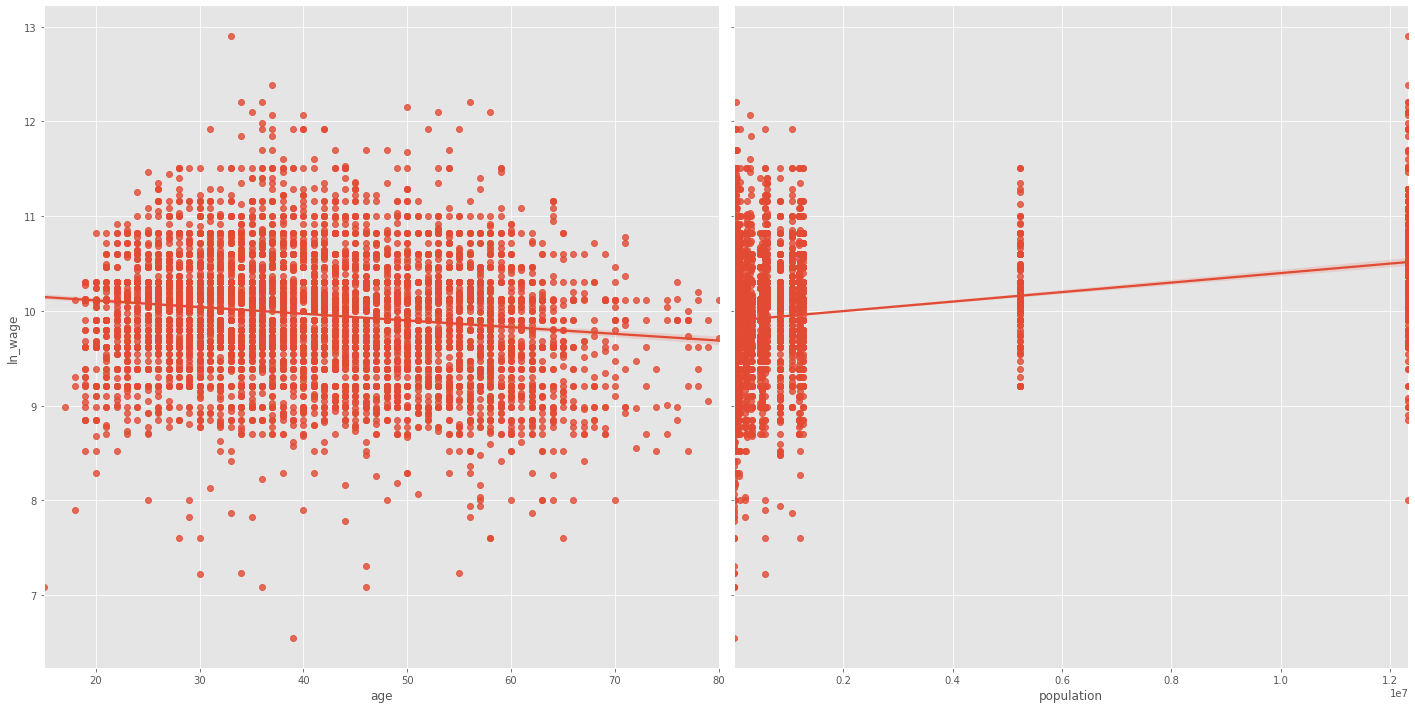

In [394]:
# Взглянем как зп зависят от возраста, кол-ва населения

sns.pairplot(
    df, 
    y_vars='ln_wage', 
    x_vars=['age', 'population'], 
    height=10,
    kind='reg',
    diag_kind=None
);

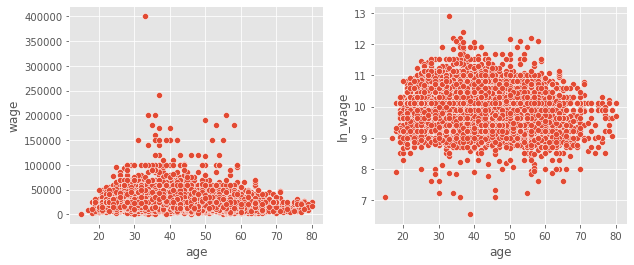

In [395]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.scatterplot(data=df, x='age', y='wage');

plt.subplot(122)
sns.scatterplot(data=df, x='age', y='ln_wage');

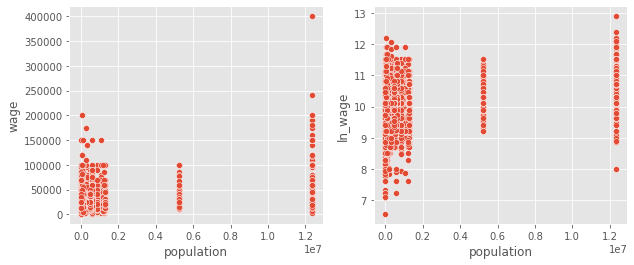

In [396]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.scatterplot(data=df, x='population', y='wage');

plt.subplot(122)
sns.scatterplot(data=df, x='population', y='ln_wage');

До 20 и после 60 люди как правило не работают и фактически на графике это видно, от 20 до 60 имеется большой разброс в данных. Зарплаты в маленьких городах явно ниже, чем в больших, или вообще близки к нулю. Дополнительно можно исследовать здесь town_type

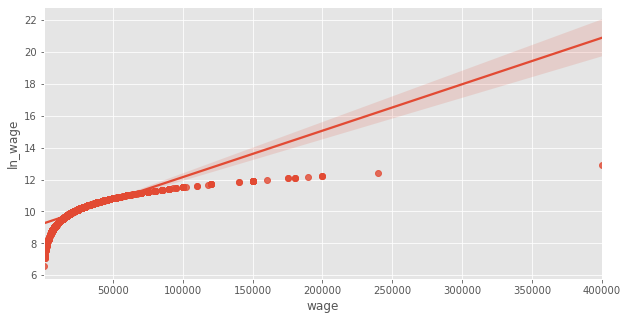

In [397]:
sns.regplot(data=df, x='wage', y='ln_wage');

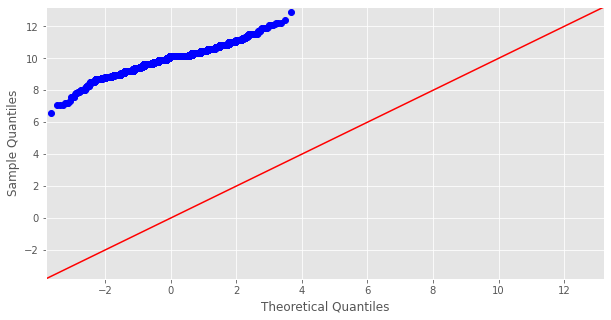

In [398]:
# 2. qq график

import pylab as py 
sm.qqplot(df.ln_wage, line ='45')
py.show()

Значения для логарифма не имеют такого разброса, как для wage, что и ожидалось при логарифмировании. На qq графике видно, что точки не ложатся на линию тренда, так как у нас скошенное распределение (как смотрели выше, вправо). Медиана примерно равна 10. Из графика возможно предположить, что он имеет нормальное распределение скошенное вправо с длинным хвостом

## Анализ факторов

**Часть 1**
- Для начала оставьте в выборке только работающих (колонка - employed)
- Проанализируйте влияние каждого фактора на зарплату
    - пол / sex
    - тип населенного пункта / **Часть 1**
- Для начала оставьте в выборке только работающих (колонка - employed)
- Проанализируйте влияние каждого фактора на зарплату
    - пол / sex
    - тип населенного пункта / town_type
    - семейное положение / marital_status
    - проффессиональная группа / professional_group
    - образование / finished_education
    - индустрия / industry
- Для анализа взаимосвязи постройте подходящие графики 
    - например, боксплоты зарплаты в зависимости от категорий или распределение зарплаты в зависимости от бинарных переменных
    - вы можете рассмотреть, как логарифм зарплаты, так и ее оригинальное значение – в зависимости от того, что решили делать с целевой переменной и как лучше видна взаимосвязь или её отсутствие
- Напишите **краткие** выводы о наличии взаимосвязи (к более развернутым выводам стоит прийти после построения регрессии)


---

Следующее задание будет связано с подготовкой датасета к one-hot кодированию, поэтому уже на этом этапе имеет смысл подумать о том, как будут закодированы категориальные факторы

Особое внимание нужно обратить на категории, которых мало в выборке. Их стоит удалить или укрупнить до собирательной категории `Иное`. Например тех, кто закончил `0-6 классов`, почти нет в выборке, коэффицент для этой категории будет не значим, поэтому эту категорию можно заранее удалить (например, удалить эти наблюдения как выбросы).

Рекомендуется проанализировать подобную таблицу для каждого фактора или нанести значения из неё на график

<a href="https://ibb.co/NFRYmxq"><img src="https://i.ibb.co/rQ9yckh/image.png" alt="image" border="0"></a>


    - семейное положение / marital_status
    - проффессиональная группа / professional_group
    - образование / finished_education
    - индустрия / industry
- Для анализа взаимосвязи постройте подходящие графики 
    - например, боксплоты зарплаты в зависимости от категорий или распределение зарплаты в зависимости от бинарных переменных
    - вы можете рассмотреть, как логарифм зарплаты, так и ее оригинальное значение – в зависимости от того, что решили делать с целевой переменной и как лучше видна взаимосвязь или её отсутствие
- Напишите **краткие** выводы о наличии взаимосвязи (к более развернутым выводам стоит прийти после построения регрессии)


---

Следующее задание будет связано с подготовкой датасета к one-hot кодированию, поэтому уже на этом этапе имеет смысл подумать о том, как будут закодированы категориальные факторы

Особое внимание нужно обратить на категории, которых мало в выборке. Их стоит удалить или укрупнить до собирательной категории `Иное`. Например тех, кто закончил `0-6 классов`, почти нет в выборке, коэффицент для этой категории будет не значим, поэтому эту категорию можно заранее удалить (например, удалить эти наблюдения как выбросы).

Рекомендуется проанализировать подобную таблицу для каждого фактора или нанести значения из неё на график

<a href="https://ibb.co/NFRYmxq"><img src="https://i.ibb.co/rQ9yckh/image.png" alt="image" border="0"></a>



**Часть 2 (бонусная, + 50 баллов)**

- При помощи инструментов для тестирования однородности выборок проверьте влияние всех на зарплату
- Для этого нужно попарно сравить однородность всех категорий друг с другом и воспользоваться корректировкой на множественное тестирование (например, методом Бенджамини-Хохберга)
- В качестве статистического теста воспользуйтесь критерием Манна-Уитни или t-тестом
- Решение лучше реализовать через фунции, циклы итд, чтобы его можно было легко применить на каждую исследуемую переменную и на любой стат. тест
    
В качестве решения, предлагается для каждого категориального признака составить свобдную таблицу, в которой будут сопоставлены все возможные пары категориальных признаков и выведен результат тестирования гипотезы об однородности с учетом корректировки. 

Например, в таблице ниже приведен результат тестирования гипотезы о равенстве средних з/п для всех возможных пар по переменной `тип населенного пункта / town_type`. На основе этой таблицы гипотеза о равенстве средней з/п в `городах` и `поселках городского типа` не отвергается, а в остальных случаях наоборот отвергается. 

<a href="https://ibb.co/HNnjyKS"><img src="https://i.ibb.co/SQRzg6j/image.png" alt="image" border="0" width=500></a>

Если проанализровать распределения з/п в зависимости от этой переменной, то в `городах` и `поселках городского типа` распределение и медианы оказываются достаточно близки, поэтому при кодировки этих двух категорий их можно объединить в одну общую `город и ПГТ`.

<a href="https://ibb.co/vQ8tLYd"><img src="https://i.ibb.co/5nV7sFj/image.png" alt="image" border="0"></a>


Ниже идут подзаголовки для каждой переменной, которая может влиять на зарплату, просьба ими пользоваться

### пол / sex

In [469]:
df.describe()

,population,age,wage,ln_wage,sex_cat,town_type_cat
count,7.912000e+03,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000
mean,1.313743e+06,40.905334,24937.741266,9.963886,0.492543,1.175177
std,3.179740e+06,11.950315,16700.603272,0.568235,0.499976,1.073061
min,7.000000e+00,15.000000,700.000000,6.551080,0.000000,0.000000
25%,1.974600e+04,31.000000,15000.000000,9.615805,0.000000,0.000000
50%,1.222470e+05,40.000000,24834.160969,10.119975,0.000000,1.000000
75%,8.434600e+05,50.000000,30000.000000,10.308953,1.000000,2.000000
max,1.233013e+07,80.000000,400000.000000,12.899220,1.000000,3.000000


In [47]:
# Закодируем мужчин 1 и женщин 0
df.sex = df.sex.apply(lambda x: 0 if x == 'Ж' else 1)

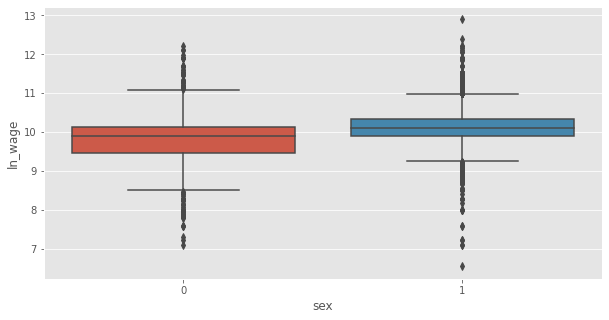

In [401]:
sns.boxplot(data=df, x='sex', y='ln_wage')
plt.show()

<AxesSubplot:>

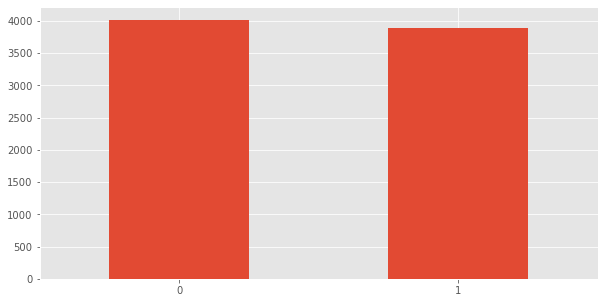

In [402]:
df['sex'].value_counts().plot.bar(rot=0)

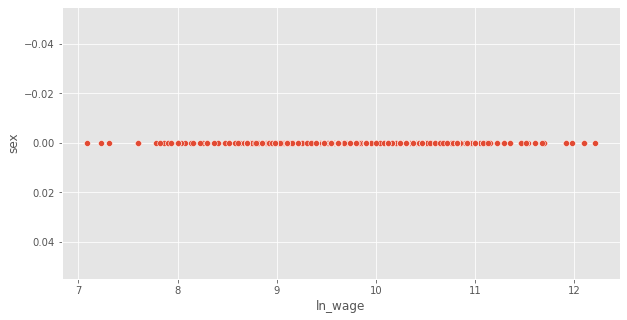

In [403]:
sns.scatterplot(data=df.loc[df['sex'] == 0], x='ln_wage', y='sex');

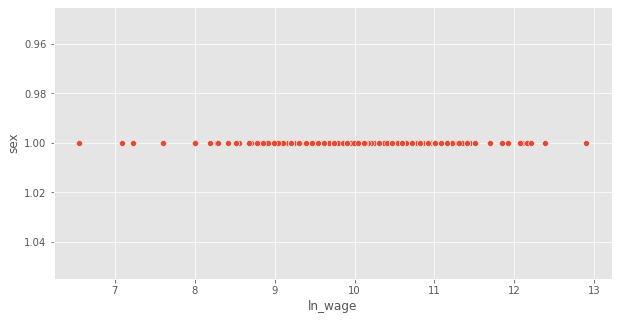

In [404]:
sns.scatterplot(data=df.loc[df['sex'] == 1], x='ln_wage', y='sex');

### тип населенного пункта / town_type

<AxesSubplot:>

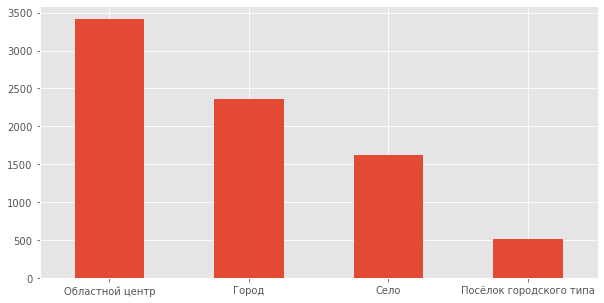

In [405]:
df['town_type'].value_counts().plot.bar(rot=0)

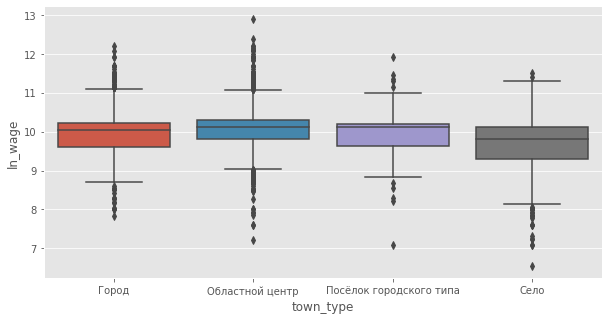

In [406]:
sns.boxplot(data=df, x='town_type', y='ln_wage')
plt.show()

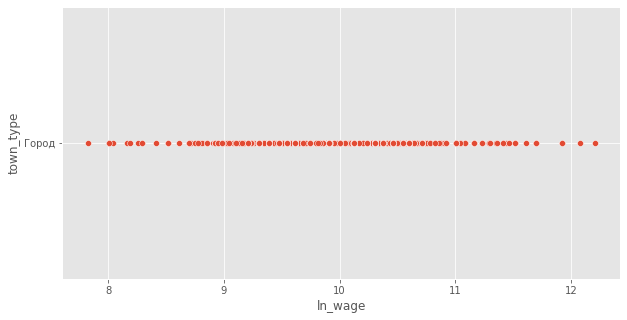

In [407]:
sns.scatterplot(data=df.loc[df['town_type'] == 'Город'], x='ln_wage', y='town_type');

### семейное положение / marital_status

<AxesSubplot:>

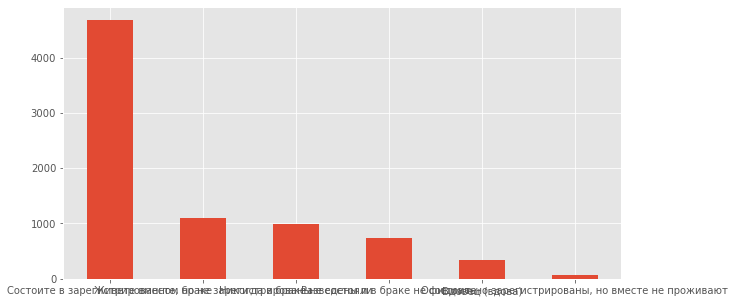

In [408]:
df['marital_status'].value_counts().plot.bar(rot=0)

In [409]:
df['marital_status'].unique()

['Разведены и в браке не состоите', 'Bдовец (вдова)', 'Никогда в браке не состояли', 'Состоите в зарегистрированном браке', 'Живете вместе, но не зарегистрированы', 'Официально зарегистрированы, но вместе не про..., NaN]
Categories (6, object): ['Разведены и в браке не состоите', 'Bдовец (вдова)', 'Никогда в браке не состояли', 'Состоите в зарегистрированном браке', 'Живете вместе, но не зарегистрированы', 'Официально зарегистрированы, но вместе не про...]

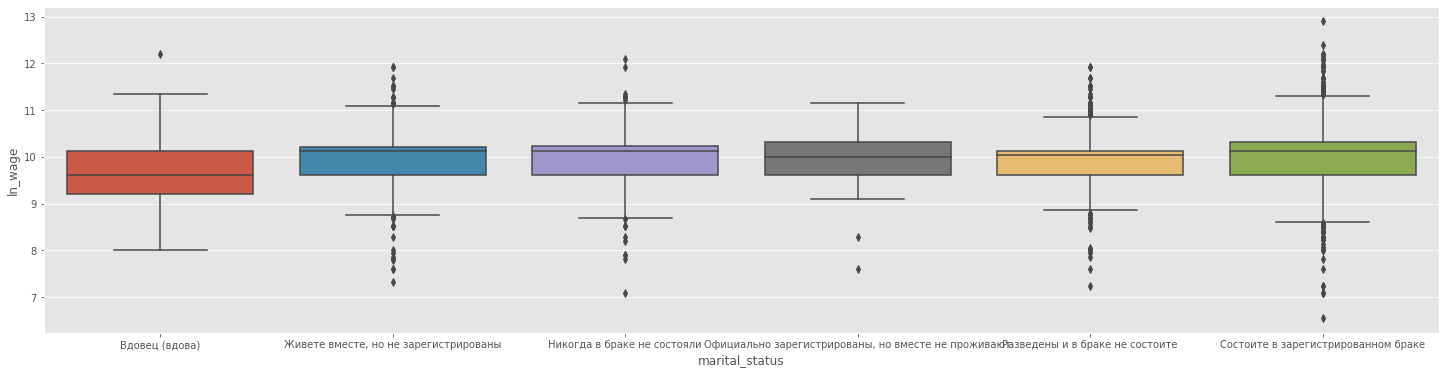

In [410]:
figure(figsize=(25, 6))

sns.boxplot(data=df, x='marital_status', y='ln_wage')
plt.show()

### проффессиональная группа / professional_group

<AxesSubplot:>

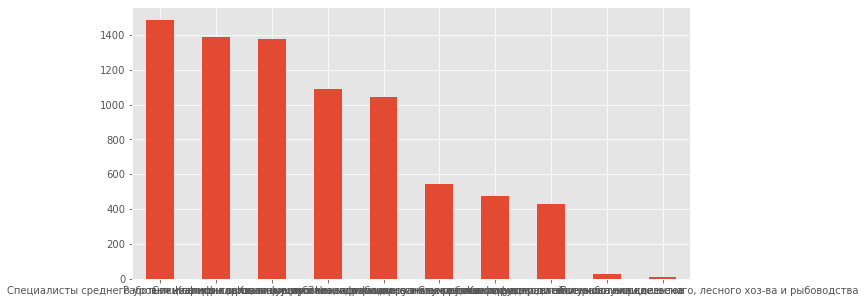

In [411]:
df['professional_group'].value_counts().plot.bar(rot=0)

In [412]:
df['professional_group'].value_counts()

Специалисты среднего уровня квалификации; чиновники                    1486
Работники сферы торговли и услуг                                       1390
Специалисты высшего уровня квалификации                                1378
Квалифицированные рабочие, исп. машины и механизмы                     1089
Квалифицированные рабочие, занятые ручным трудом                       1046
Неквалифицированные рабочие всех отраслей                               547
Законодатели; крупные чиновники; руководители высш. и сред. звена       476
Служащие офисные и по обслуживанию клиентов                             430
Военнослужащие                                                           26
Квалифицированные работники сельского, лесного хоз-ва и рыбоводства      11
Name: professional_group, dtype: int64

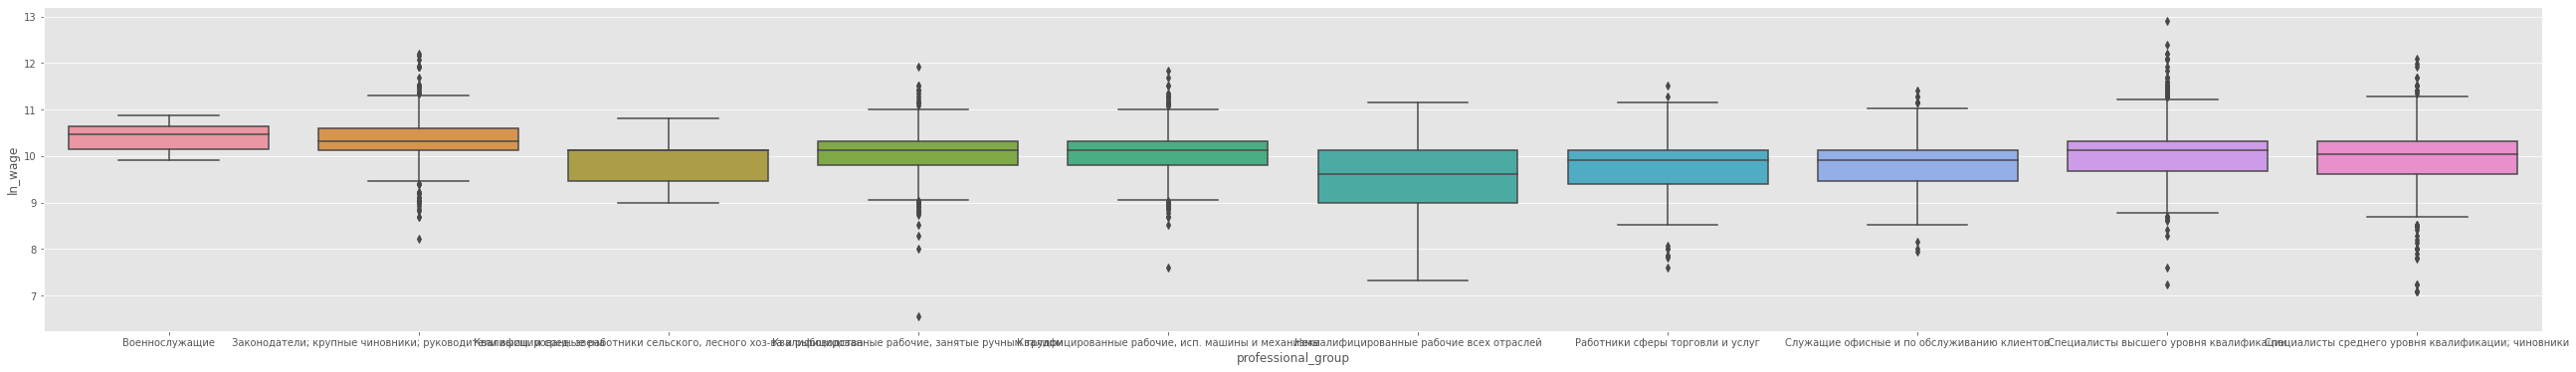

In [413]:
figure(figsize=(45, 6))

sns.boxplot(data=df, x='professional_group', y='ln_wage')
plt.show()

### образование / finished_education

<AxesSubplot:>

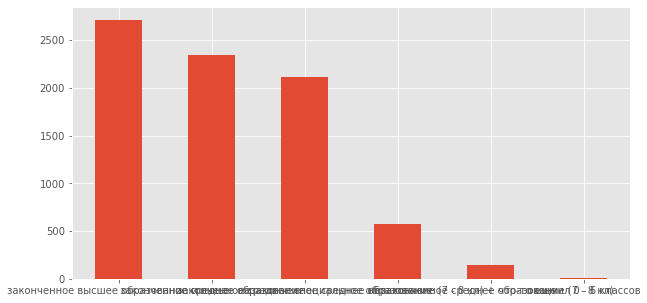

In [414]:
df['finished_education'].value_counts().plot.bar(rot=0)

In [471]:
df['finished_education'].unique()

['законченное высшее образование и выше', 'законченное среднее образование', 'незаконченное среднее образование (7 - 8 кл) ..., 'законченное среднее специальное образование', 'незаконченное среднее образование (7 - 8 кл)', 'окончил 0 - 6 классов', NaN]
Categories (6, object): ['законченное высшее образование и выше', 'законченное среднее образование', 'незаконченное среднее образование (7 - 8 кл) ..., 'законченное среднее специальное образование', 'незаконченное среднее образование (7 - 8 кл)', 'окончил 0 - 6 классов']

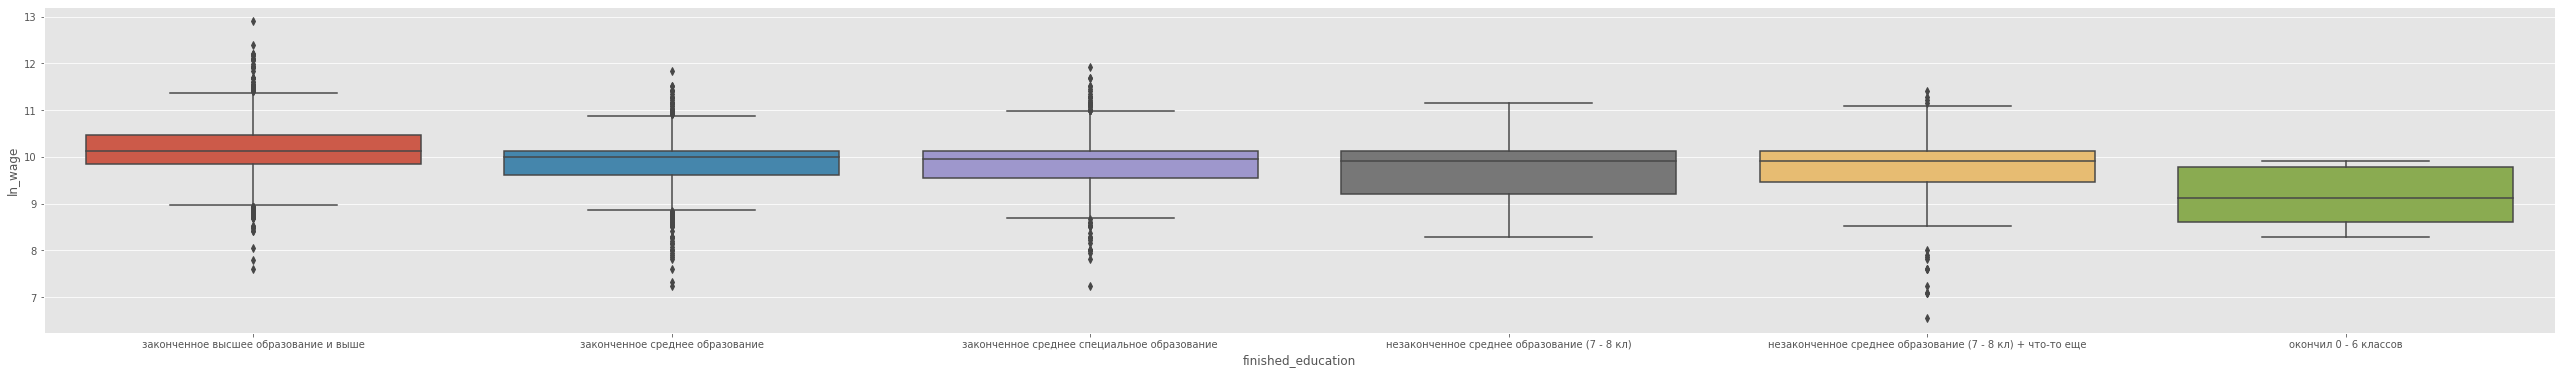

In [415]:
figure(figsize=(45, 6))

sns.boxplot(data=df, x='finished_education', y='ln_wage')
plt.show()

### индустрия / industry

<AxesSubplot:>

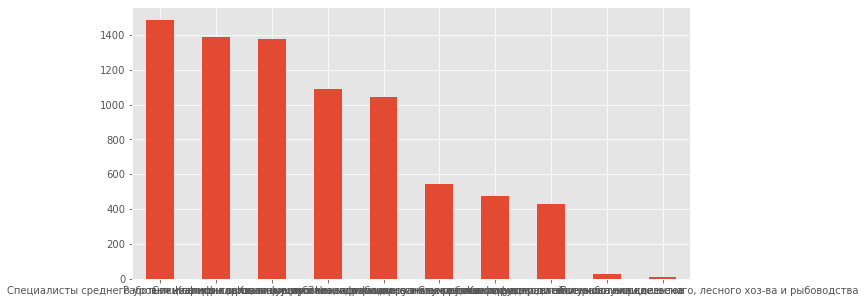

In [416]:
df['professional_group'].value_counts().plot.bar(rot=0)

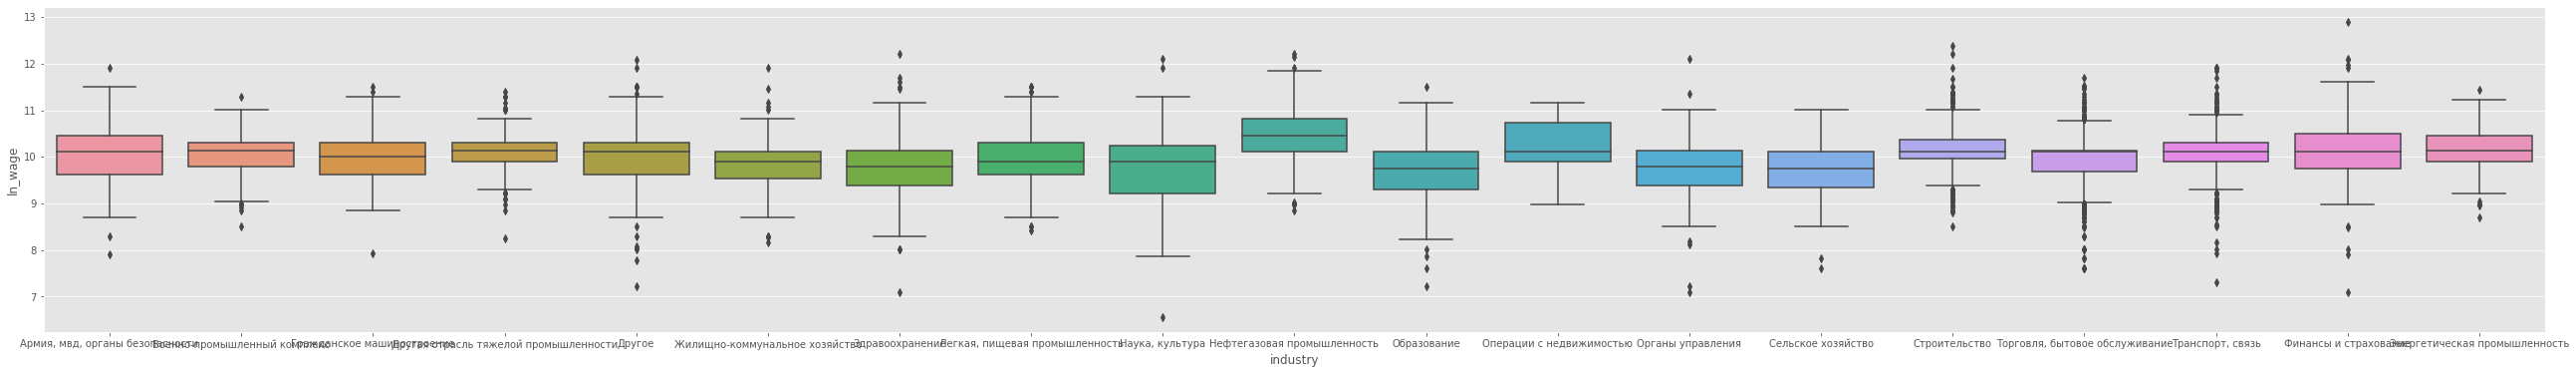

In [418]:
figure(figsize=(45, 6))

sns.boxplot(data=df, x='industry', y='ln_wage')
plt.show()

Для линейной регрессии имеет значение наличие выбросов, которые есть в каждой категории и от которых следует избавиться. Из графика видно, что боксплоты для М и Ж сильно отличаются, поэтому стоит для каждой категории строить отдельную регрессию.
Объединим Город и Поселок городского типа для рассмотрения town_type. 

'Живете вместе, но не зарегистрированы', 'Никогда в браке не состояли', 'Разведены и в браке не состоите' можно объединить в 1 категорию,
"Официально зарегистрированы, но вместе не про...' и 'Состоите в зарегистрированном браке' в другую.

В профессии сильно отличается боксплот 'Неквалифицированные рабочие всех отраслей', остальные группы можно объединить в одну для удобства построения регрессии.

незаконченное среднее образование (7 - 8 кл), законченное среднее специальное образование и законченное среднее образование будет также объединять в одну группу


## Кодировка категориальных признаков

Для построения линейной регрессии категориальные колонки предстоит закодировать с помощью one-hot-encoding. Для этого необходимо:
- для каждой категориальной колонки выбрать базовую категорию (относительно которой будет анализироваться влияние),
- удалить из анализа те категории, в которые попало слишком мало наблюдений (выбрать на ваше усмотрение такие категории), либо укрупнить их в собирательную категорию "иное"
- исходя из анализа в предыдущемм задании выбрать близкие по смыслу категории и крупнить (если гипотеза об их однородности не отвергается или если вы пришли к этому через визуальный анализ)
- те переменные, которые мало влияют на зарплату, можно не кодировать и не включать в итоговый датасет


In [51]:
# Я сама закодировала переменные, вместо one-hot-encoding, тк все равно потом пришлось бы разбивать по колонкам

geo_conditions = [
    df['town_type'] == 'Областной центр', df['town_type'] == 'Город',
]
df['area_urban'] =  np.select(geo_conditions, [1, 1], default=0)
df['area_suburban'] =  np.select(geo_conditions, [0, 0], default=1)
qual_conditions = [
    df['finished_education'] == 'законченное среднее образование',
    df['finished_education'] == 'законченное среднее специальное образование',
    df['finished_education'] == 'законченное высшее образование и выше',
    df['education'] == 'техникум с дипломом',
    df['education'] == 'есть диплом о высшем образовании',
    df['education'] == 'аспирантура и т.п. без диплома',
    df['education'] == 'аспирантура и т.п. с дипломом'
]
df['have_diploma'] = np.select(qual_conditions, [1,1,1,1,1,1,1], default=0)
df['have_not_diploma'] = np.select(qual_conditions, [0,0,0,0,0,0,0], default=1)

prof_conditions = [
    df['professional_group'] == 'Законодатели; крупные чиновники; руководители высш. и сред. звена',
    df['professional_group'] == 'Специалисты высшего уровня квалификации',
    df['professional_group'] == 'Специалисты среднего уровня квалификации; чиновники',
    df['professional_group'] == 'Служащие офисные и по обслуживанию клиентов',
    df['professional_group'] == 'Работники сферы торговли и услуг',
]

prof_conditions2 = [
    df['professional_group'] == 'Квалифицированные работники сельского, лесного хоз-ва и рыбоводства',
    df['professional_group'] == 'Квалифицированные рабочие, занятые ручным трудом',
    df['professional_group'] == 'Квалифицированные рабочие, исп. машины и механизмы',
    df['professional_group'] == 'Неквалифицированные рабочие всех отраслей',
]

df['servicemen'] = np.where(df['professional_group'] == 'Военнослужащие', 3, 0)
df['white_collar'] = np.select(prof_conditions, [2,2,2,2,2], default=0)
df['blue_collar'] = np.select(prof_conditions2, [1,1,1,1], default=0)

df['married'] = np.where(df['marital_status'] == 'Состоите в зарегистрированном браке', 1, 0)
df.head(40)

,town_type,population,age,professional_group,education,finished_education,marital_status,sex,employed,industry,wage,ln_wage,area_urban,area_suburban,have_diploma,have_not_diploma,servicemen,white_collar,blue_collar,married
0,Посёлок городского типа,12187,43.0,Специалисты высшего уровня квалификации,есть диплом о высшем образовании,законченное высшее образование и выше,Разведены и в браке не состоите,0,Вы сейчас работаете,Образование,40000.000000,10.596635,0,1,1,0,0,2,0,0
1,Посёлок городского типа,12187,61.0,Работники сферы торговли и услуг,10 и более классов школы и какое-либо професс....,законченное среднее образование,Bдовец (вдова),0,Вы сейчас работаете,Здравоохранение,28000.000000,10.239960,0,1,1,0,0,2,0,0
2,Посёлок городского типа,12187,32.0,Работники сферы торговли и услуг,7-9 классов школы (незак. средн) + без дип...,незаконченное среднее образование (7 - 8 кл) +...,Разведены и в браке не состоите,0,Вы сейчас работаете,"Торговля, бытовое обслуживание",24834.160969,10.119975,0,1,0,1,0,2,0,0
6,Посёлок городского типа,12187,45.0,Неквалифицированные рабочие всех отраслей,10 и более классов школы и какое-либо професс....,законченное среднее образование,Разведены и в браке не состоите,0,Вы сейчас работаете,"Наука, культура",32000.000000,10.373491,0,1,1,0,0,0,1,0
7,Посёлок городского типа,12187,22.0,Специалисты среднего уровня квалификации; чино...,9 классов школы,незаконченное среднее образование (7 - 8 кл) +...,Никогда в браке не состояли,1,Вы сейчас работаете,Другое,25000.000000,10.126631,0,1,0,1,0,2,0,0
9,Посёлок городского типа,12187,59.0,Работники сферы торговли и услуг,среднее образование - есть аттестат о ср. обра...,законченное среднее образование,Состоите в зарегистрированном браке,1,Вы сейчас работаете,"Наука, культура",21000.000000,9.952278,0,1,1,0,0,2,0,1
11,Посёлок городского типа,12187,33.0,Законодатели; крупные чиновники; руководители ...,10 и более классов школы и какое-либо професс....,законченное среднее образование,Разведены и в браке не состоите,0,Вы сейчас работаете,"Легкая, пищевая промышленность",40000.000000,10.596635,0,1,1,0,0,2,0,0
12,Посёлок городского типа,12187,31.0,Работники сферы торговли и услуг,10 и более классов школы и какое-либо професс....,законченное среднее образование,Состоите в зарегистрированном браке,0,Вы сейчас работаете,"Легкая, пищевая промышленность",18000.000000,9.798127,0,1,1,0,0,2,0,1
13,Посёлок городского типа,12187,26.0,Работники сферы торговли и услуг,техникум с дипломом,законченное среднее специальное образование,Никогда в браке не состояли,1,Вы сейчас работаете,"Легкая, пищевая промышленность",35000.000000,10.463103,0,1,1,0,0,2,0,0
14,Посёлок городского типа,12187,48.0,"Квалифицированные рабочие, исп. машины и механ...",10 и более классов школы и какое-либо професс....,законченное среднее образование,Состоите в зарегистрированном браке,0,Вы сейчас работаете,NaN,15000.000000,9.615805,0,1,1,0,0,0,1,1


## Линейная регрессия

- Убедитесь, что все данные готовы и постройте линейную регрессию
- Проанализируйте результаты регрессии
- Соотносятся ли результаты регрессии с разведывательным анализом данных ранее?


In [65]:
y = df[['ln_wage']]
X = df.drop(['wage', 'ln_wage', 'town_type', 'professional_group', 'education', 'finished_education', 'employed', 'industry', 'marital_status'], axis=1)
X.head()

,population,age,sex,area_urban,area_suburban,have_diploma,have_not_diploma,servicemen,white_collar,blue_collar,married
0,12187,43.0,0,0,1,1,0,0,2,0,0
1,12187,61.0,0,0,1,1,0,0,2,0,0
2,12187,32.0,0,0,1,0,1,0,2,0,0
6,12187,45.0,0,0,1,1,0,0,0,1,0
7,12187,22.0,1,0,1,0,1,0,2,0,0


In [66]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     225.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:30:47   Log-Likelihood:                -5848.3
No. Observations:                7912   AIC:                         1.172e+04
Df Residuals:                    7902   BIC:                         1.179e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.9511      0.046    108.334      0.000       4.862       5.041
population        4.407e-08   1.86e-09     23.727      0.000    4.04e-08    4.77e-08
age                 -0.0063      0.000    -13.031      0.000      -0.007      -0.005
sex                  0.3280      0.013     25.567      0.000       0.303       0.353
area_urban           2.5580      0.023    109.263      0.000       2.512       2.604
area_suburban        2.3931      0.024     98.935      0.000       2.346       2.441
have_diploma         2.5687      0.024    105.638      0.000       2.521       2.616
have_not_diploma     2.3824      0.026     92.931      0.000       2.332       2.433
servicemen           0.0695      0.044      1.567      0.117      -0.017       0.156
white_collar        -0.0097      0.044     -0.219      0.827      -0.097       0.077
blue_collar         -0.1304      0.089     -1.467      0.142      -0.305       0.044
married              0.0730      0.012      6.144      0.000       0.050       0.096
==============================================================================
Omnibus:                      356.674   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.110
Skew:                          -0.251   Prob(JB):                    3.83e-193
Kurtosis:                       4.561   Cond. No.                     7.90e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
res.params[res.pvalues <= 0.05]

const               4.951113e+00
population          4.406587e-08
age                -6.315409e-03
sex                 3.279551e-01
area_urban          2.557991e+00
area_suburban       2.393122e+00
have_diploma        2.568676e+00
have_not_diploma    2.382437e+00
married             7.295935e-02
dtype: float64

Мы получили очень низкий коэф-т детерминации, что означает, что необходимо более детально работать с признаками.
- С возрастом зарплата немного снижается
- Уровень зп немного выше в городе и у тех, у кого есть диплом об образовании
- Видим, что у военных зарплата положитнльно связана с профессией военных 

## Корректность линейной регрессии

Проверьте корректность линейной регрессии (предпосылки теоремы Гаусса-Маркова) подобно тому, как мы это делали на семинаре. Анализируя остатки регрессии, можно также использовать дополнительные тесты на ваше усмотрение.

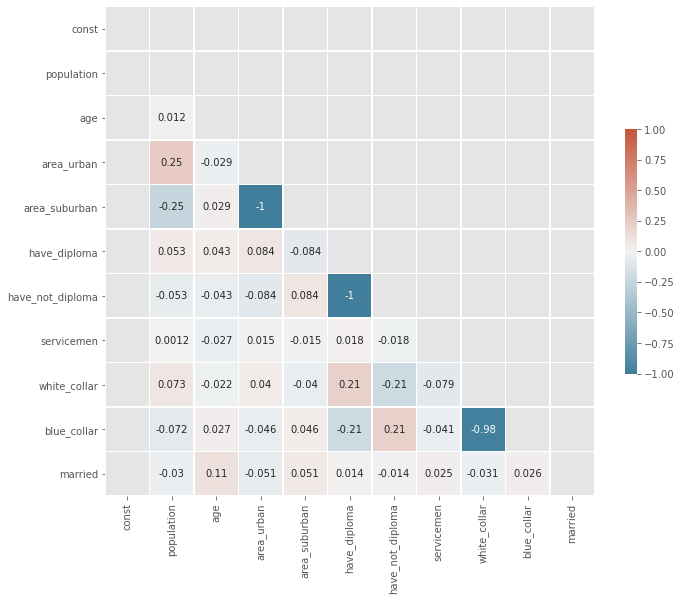

In [74]:
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, 
            center=0, vmin=-1, vmax=1,
           )
plt.show()

In [72]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(res.resid, X[['population', 'age', 'area_urban', 'area_suburban', 'have_diploma', 'have_not_diploma', 'servicemen', 'white_collar', 'blue_collar', 'married']].values)

(99.25472808699963,
 2.2262269714122633e-17,
 12.550167847074336,
 4.675571210582582e-18)

Видим, что pvalue сильно ниже уровня значимости. Гипотеза о гомоскедастичности отвергается. 